<a href="https://colab.research.google.com/github/uditkaushikk26/RL/blob/main/6sep2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
class PowerSocket:
    """ the base power socket class """

    def __init__(self, q):
        self.q = q        # the true reward value
        self.initialize() # reset the socket

    def initialize(self):
        self.Q = 0   # the estimate of this socket's reward value
        self.n = 0   # the number of times this socket has been tried

    def charge(self):
        """ return a random amount of charge """

        # the reward is a guassian distribution with unit variance around the true
        # value 'q'
        value = np.random.randn() + self.q

        # never allow a charge less than 0 to be returned
        return 0 if value < 0 else value

    def update(self,R):
        """ update this socket after it has returned reward value 'R' """

        # increment the number of times this socket has been tried
        self.n += 1

        # the new estimate of the mean is calculated from the old estimate
        self.Q = (1 - 1.0/self.n) * self.Q + (1.0/self.n) * R

    def sample(self):
        """ return an estimate of the socket's reward value """
        return self.Q


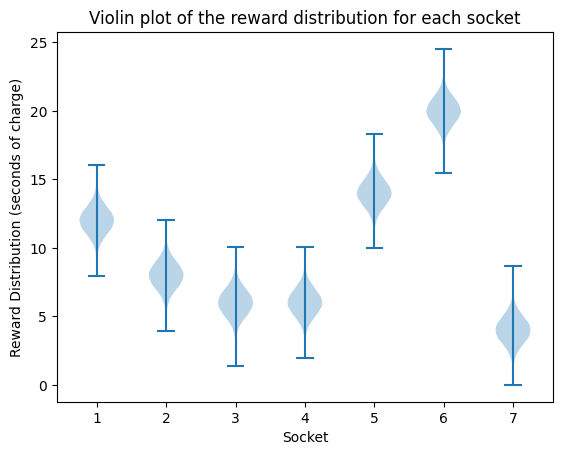

In [2]:
import random
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm
from IPython.core.pylabtools import figsize
# create 5 sockets in a fixed order
socket_order = [5,3,2,2,6,9,1]

# create the sockets
# - the mean value of each socket is derived from the socket order index, which is doubled to give
#   distinct values and offset by 2 to keep the distribution above zero
sockets = [PowerSocket((q*2)+2) for q in socket_order]

# save the number of sockets
NUM_SOCKETS = len(socket_order)
# using a very large number of time steps just to create sufficient data to get smooth plots of socket output
TOTAL_STEPS = 100000

# rewards will contain the charge returned at all of the time steps for each socket
rewards = np.zeros(shape=(TOTAL_STEPS,NUM_SOCKETS))
# Create an Optimistic Socket class by inheriting from the standard Power Socket
class OptimisticSocket( PowerSocket ):
    def __init__( self, q, **kwargs ):

        # get the initial estimate from the kwargs
        self.initial_estimate = kwargs.pop('initial_estimate', 0.)

        # pass the true reward value to the base PowerSocket
        super().__init__(q)


    def initialize(self):
        # estimate of this socket's reward value
        # - set to supplied initial value
        self.Q = self.initial_estimate

        # the number of times this socket has been tried
        # - set to 1 if an initialisation value is supplied
        self.n = 1 if self.initial_estimate  > 0 else 0

# iterate through each of the sockets
for socket_number,socket in enumerate(sockets):

    # get charge from the socket for the defined number of steps
    for t in range(TOTAL_STEPS): rewards[t,socket_number] = socket.charge()


# plot the charge we got from the sockets
plt.violinplot(rewards)
plt.xlabel('Socket')
plt.ylabel('Reward Distribution (seconds of charge)')
plt.title('Violin plot of the reward distribution for each socket')
plt.show()


<ipython-input-4-4d660a617d50>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pd.DataFrame(rewards[:,socket_number]), hist = False, kde = True,
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
<ipython-input-4-4d660a617d50>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
simil

Text(0, 0.5, 'Density')

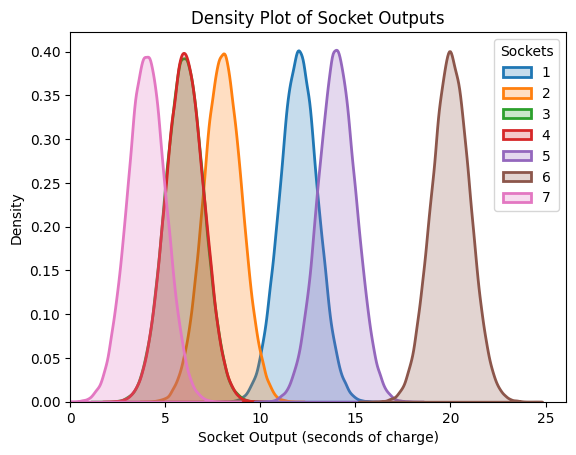

In [4]:
# iterate through the sockets to draw each plot
# (from: https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0)
for socket_number in range(NUM_SOCKETS):
    sns.distplot(pd.DataFrame(rewards[:,socket_number]), hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 2},
                 label = f'{socket_number+1}');

# Plot formatting
plt.xlim(0, None)
plt.legend(title = 'Sockets')
plt.title('Density Plot of Socket Outputs')
plt.xlabel('Socket Output (seconds of charge)')
plt.ylabel('Density')


In [7]:
import random

class PowerSocket:
    def __init__(self, mean_value, **kwargs):
        self.mean_value = mean_value
        self.kwargs = kwargs
        self.mean_reward = 0

    def charge(self):
        # Placeholder charging logic: Generate a random reward between 0 and 1
        reward = random.uniform(0, 1)
        return reward

    def update(self, reward):
        # Placeholder reward update logic: Update mean_reward with a moving average
        self.mean_reward = (self.mean_reward + reward) / 2

    def sample(self, t):
        # Placeholder sampling logic: Return the current mean_reward
        return self.mean_reward

    def get_mean_reward(self):
        return self.mean_reward

class SocketTester:
    def __init__(self, socket_class, socket_order, multiplier=2, **kwargs):
        self.sockets = [socket_class((q * multiplier) + 2, **kwargs) for q in socket_order]

    def charge_and_update(self, socket_index):
        reward = self.sockets[socket_index].charge()
        self.sockets[socket_index].update(reward)

    def select_socket(self, t):
        mean_rewards = [socket.sample(t + 1) for socket in self.sockets]
        max_reward = max(mean_rewards)
        socket_indices_with_max_reward = [i for i, reward in enumerate(mean_rewards) if reward == max_reward]
        socket_index = random.choice(socket_indices_with_max_reward)
        return socket_index

    def run(self, number_of_steps, maximum_total_reward=float('inf')):
        total_reward = 0

        for t in range(number_of_steps):
            if total_reward >= maximum_total_reward:
                break
            socket_index = self.select_socket(t)
            self.charge_and_update(socket_index)
            total_reward += self.sockets[socket_index].get_mean_reward()

        return total_reward

# Example usage:
socket_order = [1, 2, 3]
tester = SocketTester(socket_class=PowerSocket, socket_order=socket_order)
total_reward = tester.run(number_of_steps=100)

print(f"Total Reward: {total_reward}")

Total Reward: 50.97231241940399


In [9]:
# Create an Optimistic Socket class by inheriting from the standard Power Socket
class OptimisticSocket( PowerSocket ):
    def __init__( self, q, **kwargs ):

        # get the initial estimate from the kwargs
        self.initial_estimate = kwargs.pop('initial_estimate', 0.)

        # pass the true reward value to the base PowerSocket
        super().__init__(q)


    def initialize(self):
        # estimate of this socket's reward value
        # - set to supplied initial value
        self.Q = self.initial_estimate

        # the number of times this socket has been tried
        # - set to 1 if an initialisation value is supplied
        self.n = 1 if self.initial_estimate  > 0 else 0


In [10]:
# highlight the maximum value on a row
def highlight_max_row_value( row ):
    '''
    highlight the maximum value on the supplied row
    '''
    is_max = row == row.max()
    return ['background-color: yellow' if v else '' for v in is_max]

def highlight_change_in_column( col ):
    '''
    highlight the entry before the column value changes
    '''
    style = []
    for i in range(col.shape[0]):
        if i < (col.shape[0]-1) and col.iloc[i] != col.iloc[i+1]:
            style.append('background-color: yellow')
        else:
            style.append('')
    return style


In [11]:

# Test the optimistic socket over 30 time steps
tester = SocketTester( OptimisticSocket, initial_estimate = 20.)
tester.run( number_of_steps = 30 )

print(f'Mean Reward per Time Step = {tester.get_mean_reward()}')
print(f'Optimal Socket Selected = {tester.get_optimal_socket_percentage():0.3f}')
print(f'Socket Percentages = {tester.get_socket_percentages()}')
Mean Reward per Time Step = 10.770251765593038
Optimal Socket Selected = 0.655
Socket Percentages = [0.103 0.103 0.138 0.655 0.172]
In [5]:
# convert to a Pandas dataframe for table display & rename the columns to be 1-based
estimates = tester.socket_stats[:,:,0]
df = pd.DataFrame(estimates[:21])
df.columns = [1,2,3,4,5]

# show the estimates of each socket, highlighting the socket that has been selected for each time step
# - truncating to the first 20 time steps for clarity
df.style.apply(highlight_change_in_column).apply(highlight_max_row_value,axis=1,subset=df.index[-1])


SyntaxError: ignored